[Company 2-Pager + Business Justifications for Our 3 Views](https://docs.google.com/document/d/1D_PyZ9nGdyRJIwdqcoFz4EUM0pqlnOwmHBJ6biDgKOo/edit?usp=sharing)

[Data Dictionary](https://docs.google.com/spreadsheets/d/1XRNgAlzIe4Y0puhl5XcsJVhZEgW2AAUdpHBjSxrfCjQ/edit?usp=sharing)

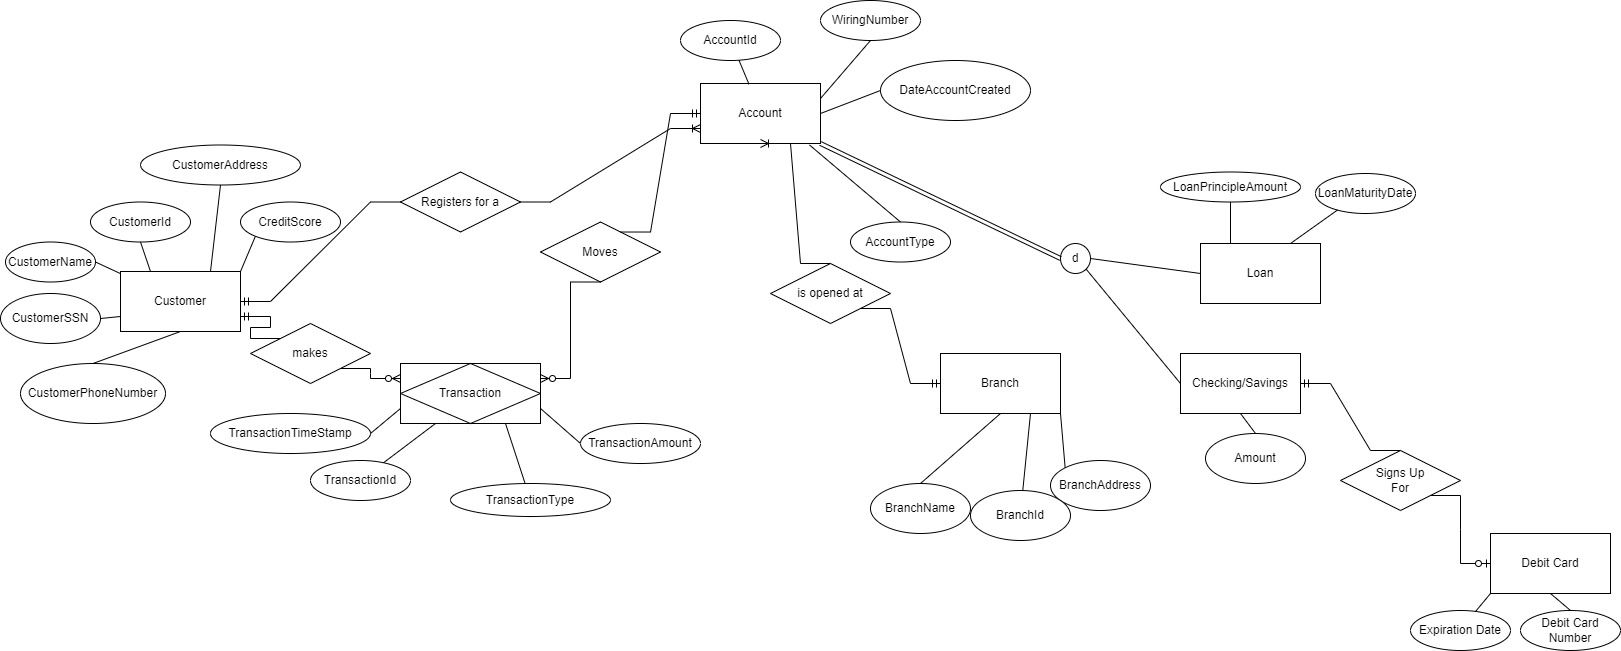

DATABASE INFO

In [ ]:
%load_ext sql
%sql sqlite://

'Connected: @None'

In [ ]:
%%sql
select sqlite_version();

 * sqlite://
Done.


sqlite_version()
3.22.0


In [ ]:
%%sql
PRAGMA foreign_keys = ON;

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS Branch(
  BranchId INTEGER PRIMARY KEY,
  BranchName TEXT NOT NULL,
  BankAddress TEXT NOT NULL
)
-- Branch stores the name and location for each branch of the bank

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS Customer(
  CustomerId INTEGER PRIMARY KEY,
  CustomerName TEXT NOT NULL,
  CustomerSSN TEXT UNIQUE,
  CustomerPhoneNumber TEXT,
  CustomerAddress TEXT NOT NULL,
  CreditScore INTEGER
)
-- Customer stores basic information about the customer including name, SSN, contact information, and creditscore(for loans)

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS Account(
  AccountId INTEGER PRIMARY KEY,
  AccountType TEXT NOT NULL,
  BranchID INTEGER NOT NULL,
  CustomerID INTEGER NOT NULL,
  FOREIGN KEY(BranchID) REFERENCES Branch(BranchID),
  FOREIGN KEY(CustomerId) REFERENCES Customer(CustomerId)
)
-- Account is a supertype, and stores the basic common information about its subtypes
-- Account also includes an attribute known as "AccountType" that shows what subtype each account belongs to
-- Account has a foreign key referencing BranchID from Branch because each account is associated with a bank branch
-- Account has a foreign key referencing CustomerID from Customer because each account is associated with a customer

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS Loan(
  LoanAccountId INTEGER PRIMARY KEY,
  LoanPrincipleAmount INTEGER NOT NULL,
  LoanMaturityDate INTEGER NOT NULL,
  FOREIGN KEY(LoanAccountId) REFERENCES Account(AccountId)
)
-- Loan is a subtype of Account
-- Loans act like a account because of values going up and down with payments and interest
-- Loan has a foreign key to reference AccountID from Account because LoanAccountID is synonymous with AccountID from Account

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS CheckingorSavings(
  CheckingOrSavingsAccountId INTEGER PRIMARY KEY,
  Amount Float NOT NULL,
  FOREIGN KEY(CheckingOrSavingsAccountId) REFERENCES Account(AccountId)
)
-- CheckingorSavings is a subtype of Account
-- CheckingorSavings has a foreign key to reference AccountID from Account
-- It has this foreign key because CheckingorSavingsAccountID is synonymous with AccountID from Account

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS Transactions( -- has to be "transactions", "transaction" is a keyword in sql
  TransactionId INTEGER PRIMARY KEY,
  TransactionDate DATE NOT NULL,
  TransactionAmount FLOAT NOT NULL,
  TransactionType TEXT NOT NULL,
  AccountId INTEGER NOT NULL,
  --removed TransactionFrom
  --removed CustomerId
  FOREIGN KEY(AccountId) REFERENCES Account(AccountId)

)
-- Transactions is the most important table as transactions are at the core of banking
-- Transactions holds every transaction that goes through the bank
-- 2 foreign keys track the accounts where transactions are from and where they are going to
-- The 3rd foreign key references CustomerID from Customer because every transaction is associated with a bank customer

 * sqlite://
Done.


[]

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS DebitCard(
  DebitCardNumber TEXT PRIMARY KEY,
  ExpirationDate DATE NOT NULL,
  AccountId INTEGER NOT NULL,
  FOREIGN KEY(AccountId) REFERENCES CheckingorSavings(CheckingOrSavingsAccountId)
  )
  -- DebitCard stores information about debit cards such as expiration date or debit card number
  -- DebitCard has a foreign key referencing CheckingorSavingsAccountID from the CheckingorSavings table
  -- It has this foreign key because debit cards are attached to checking accounts which fall within the CheckingorSavings subtype

 * sqlite://
Done.


[]

POPULATE DATA

In [ ]:
%%sql
--Branch
INSERT INTO Branch(BranchId,BankAddress, BranchName) VALUES (1,'129 Main Street San Jose CA 94088', 'San Jose Branch');
INSERT INTO Branch(BranchId,BankAddress, BranchName) VALUES (2,'1111 Washington St, Santa Clara, CA 95050', 'Santa Clara Branch');
INSERT INTO Branch(BranchId,BankAddress, BranchName) VALUES (3,'295 S Mathilda Ave, Sunnyvale, CA 94086', 'Sunnyvale Branch');




 * sqlite://
Done.
1 rows affected.
1 rows affected.


[]

In [ ]:
%%sql
--Customer
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (1,'Justin North', "435-23-5632", "232-234-1234", "500 El Camino Real, Santa Clara CA 95053", 640);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (2,'Alexandra Zhu', "123-45-6789", NULL, "500 El Camino Real, Santa Clara CA 95053", 720);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (3,'Ria Panda', "335-67-2589", "529-602-8859", "500 El Camino Real, Santa Clara CA 95053", 840);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (4,'Cameron Lee', "256-15-8632", "184-060-2293", "500 El Camino Real, Santa Clara CA 95053", 586);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (5,'Ishan Krishnakumar', "268-98-3029", "359-201-8849", "500 El Camino Real, Santa Clara CA 95053", 602);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (6,'Michael Schermann', "582-95-9302", "295-820-5582", "500 El Camino Real, Santa Clara CA 95053", 700);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (7,'Lebron James', "437-23-7832", "102-234-5123", "970 Corte Madera Sunnyvale CA 94085", 600);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (8,'Russell Westbrook', "303-47-6889", NULL, "1235 Bordeaux Dr, Sunnyvale, CA 94089", 720);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (9,'Greg South', "337-67-5689", "529-112-6859", "165 Gibraltar Ct, Sunnyvale, CA 94089", 800);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (10,'Carter Lee', "446-15-4432", "184-060-9993", "298 W McKinley Ave, Sunnyvale, CA 94086", 556);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (11,'Matthew Hayes', "558-58-5029", "359-201-7849", "125 E El Camino Real, Sunnyvale, CA 94087", 652);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (12,'Greg Schermann', "482-95-8302", "295-202-8205", "1180 Discovery Wy, Sunnyvale, CA 94089", 750);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (13,'Grant North', "834-23-5732", "232-234-9898", "895 Villa St, Mountain View, CA 94041", 630);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (14,'Walter North', "124-45-4489", NULL, "1350 Grant Rd, Mountain View, CA 94040", 720);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (15,'Amy North', "332-12-2589", "405-602-4859", "855 E El Camino Real, Sunnyvale, CA 94087", 540);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (16,'Jessie Loboy', "256-20-8532", "999-060-2293", "760 Harrison St, Santa Clara CA 95053", 686);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (17,'Haoning Richter', "105-98-3029", "335-920-1849", "750 Harrison St, Santa Clara CA 95053", 502);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (18,'Jace Norton', "582-56-9502", "295-882-0582", "760 Poplar St, Santa Clara CA 95053", 600);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (19,'Anathea Kordosky', "245-23-5532", "789-223-4123", "720 Poplar St, Santa Clara CA 95053", 740);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (20,'Michael Nocerino', "123-03-3389", NULL, "201 S Market St, San Jose, CA 95113", 675);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (21,'Christian Tarr', "205-67-4585", "807-960-2859", "1710 Old Oakland Rd, San Jose, CA 95131", 844);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (22,'Maria Smith', "226-15-6632", "184-050-0293", "240 Jackson St, San Jose, CA 95112", 555);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (23,'Emily Hawkins', "668-98-6629", "359-220-9949", "1709 Automation Pkwy, San Jose, CA 95101", 612);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (24,'Hayley Hunt', "502-05-9002", "295-820-5082", "1705 Automation Pkwy, San Jose, CA 95101", 790);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (25,'Justin South', "475-23-7077", "078-234-5554", "540 El Camino Real, Santa Clara CA 95053", 540);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (26,'Harry Potter', "163-45-9999", NULL, "511 El Camino Real, Santa Clara CA 95053", 323);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (27,'Hermoine Granger', "305-37-2533", "500-602-7759", "500 El Camino Real, Santa Clara CA 95053", 845);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (28,'Ron Weasley', "206-05-8002", "174-060-7793", "500 El Camino Real, Santa Clara CA 95053", 585);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (29,'Lucius Malfoy', "208-28-3339", "359-111-0049", "512 El Camino Real, Santa Clara CA 95053", 605);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (30,'Draco Malfoy', "511-11-9302", "295-757-0082", "508 El Camino Real, Santa Clara CA 95053", 750);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (31,'Severus Snape', "207-20-0830", "102-346-5123", "950 Corte Madera Sunnyvale CA 94085", 640);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (32,'Albus Dumbledore', "300-17-2289", NULL, "1555 Bordeaux Dr, Sunnyvale, CA 94089", 730);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (33,'Fred Weasley', "207-57-0009", "529-348-6859", "130 Gibraltar Ct, Sunnyvale, CA 94089", 810);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (34,'George Weasley', "116-25-2232", "184-060-3483", "345 W McKinley Ave, Sunnyvale, CA 94086", 556);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (35,'Tom Riddle', "008-18-2029", "359-201-3349", "347 E El Camino Real, Sunnyvale, CA 94087", 452);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (36,'Michael Scott', "102-15-1302", "107-202-8205", "1188 Discovery Wy, Sunnyvale, CA 94089", 350);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (37,'Pam Beasley', "994-93-9932", "232-457-9898", "899 Villa St, Mountain View, CA 94041", 635);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (38,'Jim Halpert', "144-05-0089", NULL, "1351 Grant Rd, Mountain View, CA 94040", 725);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (39,'Andy Bernard', "399-19-2189", "405-784-4859", "854 E El Camino Real, Sunnyvale, CA 94087", 545);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (40,'Dwight Schrute', "250-10-1132", "109-060-2293", "780 Harrison St, Santa Clara CA 95053", 685);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (41,'Nolan Grogan', "995-98-2029", "275-920-1849", "754 Harrison St, Santa Clara CA 95053", 732);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (42,'Matthew Pham', "502-16-7502", "345-802-0582", "730 Poplar St, Santa Clara CA 95053", 710);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (43,'Nolan Larkin', "275-13-5512", "554-223-4123", "630 Poplar St, Santa Clara CA 95053", 710);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (44,'Gabe Roulier', "823-03-7789", NULL, "601 S Market St, San Jose, CA 95113", 615);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (45,'Redmond Dinger', "223-33-4585", "888-900-2859", "1410 Old Oakland Rd, San Jose, CA 95131", 544);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (46,'Cole Loboy', "226-58-6222", "204-050-1293", "400 Jackson St, San Jose, CA 95112", 755);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (47,'Brett East', "678-66-6620", "430-221-9909", "1509 Automation Pkwy, San Jose, CA 95101", 712);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (48,'Bucky Bronco', "552-48-9482", "495-850-1182", "1505 Automation Pkwy, San Jose, CA 95101", 690);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (49,'Joe Hebert', "113-13-4511", "808-990-2459", "1810 Old Oakland Rd, San Jose, CA 95131", 700);
INSERT INTO Customer(CustomerId, CustomerName, CustomerSSN, CustomerPhoneNumber, CustomerAddress, CreditScore) VALUES (50,'Seth Altshuler', "222-55-5522", "244-040-1443", "463 Jackson St, San Jose, CA 95112", 750);

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [ ]:
%%sql
--Account
--CustomerId has to match CustomerId in Customer Table
INSERT INTO Account(AccountId, AccountType, BranchID, CustomerID) VALUES (1, 'Checking/Savings', 1, 1);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (2, 'Checking/Savings', 1, 2);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (3, 'Checking/Savings', 2, 3);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (4, 'Checking/Savings', 1, 4);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (5, 'Loan', 2, 5);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (6, 'Loan', 1, 6);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (7, 'Loan', 2, 7);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (8, 'Checking/Savings', 1, 8);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (9, 'Checking/Savings', 2, 9);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (10, 'Checking/Savings', 3, 10);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (11, 'Loan', 2, 11);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (12, 'Loan', 3, 12);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (13, 'Checking/Savings', 3, 13);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (14, 'Loan', 1, 14);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (15, 'Checking/Savings', 3, 15);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (16, 'Checking/Savings', 2, 16);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (17, 'Loan', 2, 17);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (18, 'Checking/Savings', 3, 18);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (19, 'Checking/Savings', 2, 19);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (20, 'Loan', 1, 20);
INSERT INTO Account(AccountId, AccountType, BranchID, CustomerID) VALUES (21, 'Loan', 1, 21);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (22, 'Checking/Savings', 3, 22);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (23, 'Loan', 2, 23);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (24, 'Checking/Savings', 3, 24);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (25, 'Loan', 2, 25);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (26, 'Loan', 3, 26);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (27, 'Loan', 2, 27);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (28, 'Checking/Savings', 2, 28);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (29, 'Loan', 3, 29);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (30, 'Checking/Savings', 3, 30);
INSERT INTO Account(AccountId, AccountType, BranchID, CustomerID) VALUES (31, 'Loan', 1, 31);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (32, 'Checking/Savings', 3, 32);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (33, 'Checking/Savings', 2, 33);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (34, 'Loan', 3, 34);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (35, 'Loan', 2, 35);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (36, 'Checking/Savings', 1, 36);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (37, 'Loan', 3, 37);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (38, 'Checking/Savings', 3, 38);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (39, 'Loan', 2, 39);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (40, 'Loan', 3, 40);
INSERT INTO Account(AccountId, AccountType, BranchID, CustomerID) VALUES (41, 'Checking/Savings', 1, 41);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (42, 'Checking/Savings', 2, 42);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (43, 'Loan', 3, 43);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (44, 'Checking/Savings', 1, 44);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (45, 'Loan', 3, 45);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (46, 'Loan', 1, 46);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (47, 'Loan', 2, 47);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (48, 'Checking/Savings', 1, 48);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (49, 'Checking/Savings', 2, 49);
INSERT INTO Account(AccountID, AccountType, BranchID, CustomerID) VALUES (50, 'Checking/Savings', 3, 50);

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [ ]:
%%sql
--Loan
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(5, 2000,'2025-01-01');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(6, 2000,'2025-01-07');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(7, 2000,'2025-01-18');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(11, 2000,'2025-02-19');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(12, 2000,'2025-02-27');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(14, 2000,'2025-03-10');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(17, 2000,'2025-03-11');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(20, 2000,'2025-03-19');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(21, 2000,'2025-03-30');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(23, 2000,'2025-04-02');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(25, 2000,'2025-04-09');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(26, 2000,'2025-06-13');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(27, 2000,'2025-08-17');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(29, 2000,'2025-09-24');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(31, 2000,'2025-10-31');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(34, 2000,'2025-12-29');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(35, 2000,'2025-12-31');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(37, 2000,'2026-02-04');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(39, 2000,'2026-05-17');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(40, 2000,'2026-7-23');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(43, 2000,'2026-09-19');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(45, 2000,'2026-11-28');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(46, 2000,'2026-11-09');
INSERT INTO Loan(LoanAccountID, LoanPrincipleAmount, LoanMaturityDate) VALUES(47, 2000,'2026-12-24');

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [ ]:
%%sql
--CheckingOrSaving
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(1, 2000.20);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(2, 200.20);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(3, 457.34);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(4, 345.45);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(8, 57000.45);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(9, 23000.54);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(10, 12000.78);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(13, 89.24);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(15, 38.24);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(16, 1245.45);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(18, 999.24);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(19, 5000.24);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(22, 3478.34);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(24, 9845.42);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(28, 6070.24);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(30, 8834.40);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(32, 8934.23);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(33, 4000.34);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(36, 723.45);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(38, 505.77);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(41, 876.45);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(42, 4020.25);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(44, 1032.21);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(48, 1080.45);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(49, 3430.25);
INSERT INTO CheckingorSavings(CheckingorSavingsAccountID, Amount) VALUES(50, 5077.45);



 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [ ]:
%%sql
--Transaction
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-01', 200.20, 'Credit', 1);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-05', 20.15, 'Debit', 3);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-07', 55.00, 'Debit', 2);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-08', 1050.00, 'Credit', 41);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-09', 3.05, 'Credit', 22);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-10', 200.07, 'Debit', 10);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-16', 200.45, 'Credit', 13);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-01-30', 77.56, 'Debit', 15);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-02-03', 2045.56, 'Debit', 16);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-02-06', 103.45, 'Credit', 18);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-02-11', 320.20, 'Credit', 22);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-02-20', 201.15, 'Debit', 24);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-02-28', 507.00, 'Debit', 21);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-03', 1230.00, 'Debit', 30);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-05', 32.15, 'Debit', 32);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-06', 600.45, 'Debit', 41);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-06', 600.45, 'Credit', 42);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-10', 771.56, 'Credit', 48);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-13', 2205.56, 'Credit', 49);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-15', 1032.05, 'Debit', 50);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-15', 1032.05, 'Credit', 1);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-17', 67.15, 'Debit', 3);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-18', 106.00, 'Debit', 2);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-20', 307.17, 'Debit', 19);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-26', 13.05, 'Debit', 22);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-03-31', 605.07, 'Debit', 5);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-02', 450.45, 'Credit', 28);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-05', 177.46, 'Debit', 8);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-07', 45.56, 'Credit', 9);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-07', 43.45, 'Credit', 22);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-11', 20.20, 'Credit', 28);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-12', 11.15, 'Debit', 41);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-18', 156.00, 'Credit', 49);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-19', 2230.00, 'Debit', 50);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-21', 320.15, 'Debit', 1);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-22', 534.07, 'Debit', 13);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-24', 650.45, 'Credit', 38);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-26', 701.56, 'Debit', 41);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-27', 105.56, 'Credit', 30);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-29', 1052.05, 'Debit', 32);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-04-30', 443.45, 'Debit', 6);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-01', 450.26, 'Credit', 28);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-04', 112.15, 'Debit', 41);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-05', 1156.00, 'Credit', 49);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-10', 130.00, 'Debit', 50);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-17', 750.15, 'Debit', 1);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-19', 534.07, 'Debit', 13);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-19', 534.07, 'Credit', 38);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-26', 741.56, 'Debit', 41);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-27', 125.56, 'Credit', 30);
INSERT INTO transactions(TransactionDate,TransactionAmount, TransactionType, AccountId) VALUES('2022-05-29', 752.05, 'Debit', 32);




 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [ ]:
%%sql
--DebitCard
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('5603 9832 7014 9208', '2023-12-01', 1);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('7603 6842 7064 3417', '2024-10-01', 2);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('8744 4710 9146 9434', '2023-06-01', 3);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('8973 1999 8133 6176', '2024-03-01', 4);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('7546 6535 6333 2349', '2026-01-01', 8);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('1834 3314 8707 1963', '2022-07-01', 9);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('5558 8446 3206 1968', '2022-09-01', 10);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('3456 9536 9859 9510', '2024-11-01', 13);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('5895 3246 8232 6915', '2025-10-01', 15);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('4674 5583 8301 3242', '2023-05-01', 16);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('5376 4463 2068 6103', '2022-06-01', 18);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('9576 5102 0561 4744', '2024-08-01', 19);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('5636 1082 1173 7232', '2022-09-01', 22);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('4307 9160 0054 6310', '2025-05-01', 24);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('1631 2844 9680 0904', '2026-05-01', 28);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('8835 2910 4067 3352', '2022-07-01', 30);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('8866 2024 2393 4930', '2024-03-01', 32);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('3848 7230 3326 5444', '2024-04-01', 33);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('2019 8773 3765 1779', '2024-02-01', 36);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('5051 1465 3390 4641', '2022-04-01', 38);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('2375 7997 2388 5059', '2023-03-01', 41);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('8750 8207 3168 4626', '2025-04-01', 42);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('6548 7645 3920 2902', '2026-05-01', 44);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('8160 8431 1643 7193', '2022-08-01', 48);
INSERT INTO DebitCard(DebitCardNumber, ExpirationDate, AccountId) VALUES('8875 0410 4067 0052', '2022-07-01', 49);

-- Debit cards traditionally expire on the first day of a certain month.

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
0 rows affected.


[]

SQL QUERIES/ CREATE VIEW TABLES

In [ ]:
%%sql
--How many customers have more than $500 in their account?
CREATE VIEW Account_Amount_Greater_Than_Minimum
AS
SELECT
  a.AccountId
  ,c.CustomerName
  ,cs.Amount
FROM Account a
LEFT JOIN CheckingorSavings cs
ON a.AccountId = cs.CheckingOrSavingsAccountId
LEFT JOIN Customer c
ON c.CustomerId = a.CustomerId
WHERE cs.Amount > 500
ORDER BY cs.amount desc;

 * sqlite://
Done.


[]

In [ ]:
%%sql
--How many customers have a credit score over 650 opened an account in the Santa Clara location
-- A high credit score means the bank can extend low interest rates
CREATE VIEW Eligible_For_Low_Interest_Rates
AS
SELECT
  c.CreditScore
  ,c.CustomerId
  ,c.CustomerName
  ,a.AccountId
FROM Customer c
LEFT JOIN Account a
ON a.CustomerId = c.CustomerID
LEFT JOIN Branch b
ON b.BranchId = a.BranchID
WHERE c.CreditScore > 650 AND b.BranchId = 2
ORDER BY c.creditscore desc;

 * sqlite://
Done.


[]

In [ ]:
%%sql
--The Bank wants to find Debit Cards that will expire in the next 6 months
--They want to alert customers with soon-to-expire debit cards
--The alert will remind customers to sign up for a new debit card
CREATE VIEW Cards_About_To_Expire
AS
SELECT
  c.CustomerName
  ,c.CustomerPhoneNumber
  ,d.ExpirationDate
FROM DebitCard d
LEFT JOIN CheckingorSavings cs
ON d.AccountID = cs.CheckingorSavingsAccountID
LEFT JOIN Account a
ON cs.CheckingorSavingsAccountID = a.AccountID
LEFT JOIN Customer c
on a.CustomerID = c.CustomerID
WHERE d.ExpirationDate between '2022-06-15' and '2022-12-15';

 * sqlite://
Done.


[]

VIEW TABLES

In [ ]:
%%sql
SELECT
*
FROM
Account_Amount_Greater_Than_Minimum;

 * sqlite://
Done.


AccountId,CustomerName,Amount
8,Russell Westbrook,57000.45
9,Greg South,23000.54
10,Carter Lee,12000.78
24,Hayley Hunt,9845.42
32,Albus Dumbledore,8934.23
30,Draco Malfoy,8834.4
28,Ron Weasley,6070.24
50,Seth Altshuler,5077.45
19,Anathea Kordosky,5000.24
42,Matthew Pham,4020.25


In [ ]:
%%sql
SELECT
*
FROM
Eligible_For_Low_Interest_Rates;

 * sqlite://
Done.


CreditScore,CustomerId,CustomerName,AccountId
845,27,Hermoine Granger,27
840,3,Ria Panda,3
810,33,Fred Weasley,33
800,9,Greg South,9
740,19,Anathea Kordosky,19
712,47,Brett East,47
710,42,Matthew Pham,42
700,49,Joe Hebert,49
686,16,Jessie Loboy,16
652,11,Matthew Hayes,11


In [ ]:
%%sql
SELECT
*
FROM
Cards_About_To_Expire;

 * sqlite://
Done.


CustomerName,CustomerPhoneNumber,ExpirationDate
Greg South,529-112-6859,2022-07-01
Carter Lee,184-060-9993,2022-09-01
Maria Smith,184-050-0293,2022-09-01
Draco Malfoy,295-757-0082,2022-07-01
Bucky Bronco,495-850-1182,2022-08-01
Joe Hebert,808-990-2459,2022-07-01
